PIPELINE FINISHED Merged DF updated

## Testing various merged_label size for optimal train / test size

In [ ]:
##DSC80 environment
import os
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
import random


# read csv file
data = pd.read_csv("../../data/merged_label.csv")
data.head()

,link,label,text
0,https://www.nature.com/articles/s41566-019-0398-2,1,Surface passivation of perovskite film for eff...
1,https://www.nature.com/articles/s41560-020-007...,1,Intact 2D/3D halide junction perovskite solar ...
2,https://www.nature.com/articles/s41467-021-236...,1,Multication perovskite 2D/3D interfaces form v...
3,https://doi.org/10.1038%2Fs41586-022-04604-5,1,Stability-limiting heterointerfaces of perovsk...
4,https://doi.org/10.1038%2Fs41467-022-30426-0,1,Imaging and quantifying non-radiative losses a...


In [2]:
# Function to calculate Balanced Error Rate
def balanced_error_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ber = 1 - (sensitivity + specificity) / 2
    return ber

# Model Evaluation Function with Train/Test Accuracy
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    # Predictions on test and train sets
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Accuracy scores
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Classification report for recall
    report = classification_report(y_test, y_pred_test, output_dict=True)
    test_recall = report['1']['recall'] 
    
    # Balanced Error Rate for test set
    test_ber = balanced_error_rate(y_test, y_pred_test)
    
    print(f"\nEvaluation Report for {model_name}:\n")
    print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_test))
    print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test))
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Recall): {test_recall}")
    print("Balanced Error Rate (Test Set):", test_ber)
    
    # Return metrics as dictionary for further use
    return {
        "model_name": model_name,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "test_recall": test_recall,
        "test_ber": test_ber
    }

In [3]:
data.shape

(132, 3)

## Creating different data_size df

In [4]:
Merged_size = [132, 100, 70, 40]

# list to keep record of performance metric
recall_before = []
accuracy_before = []
ber_before = []

In [5]:
# # Convert the text data to TF-IDF features
# tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
# X = tfidf_vectorizer.fit_transform(data['text'])  
# y = data['label'] 
# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
## Default data size - 132

# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
X_132 = tfidf_vectorizer.fit_transform(data['text'])  
y_132 = data['label'] 
# Split into training and testing sets
X_train_132, X_test_132, y_train_132, y_test_132 = train_test_split(X_132, y_132, test_size=0.2, random_state=42)

In [7]:
## Default data size - 100
data_100 = data.sample(n=100, random_state=42)  # random_state ensures reproducibility

# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
X_100 = tfidf_vectorizer.fit_transform(data_100['text'])  
y_100 = data_100['label'] 
# Split into training and testing sets
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.2, random_state=42)


In [8]:
## Default data size - 70
data_70 = data.sample(n=70, random_state=42)  # random_state ensures reproducibility

# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
X_70 = tfidf_vectorizer.fit_transform(data_70['text'])  
y_70 = data_70['label'] 
# Split into training and testing sets
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_70, y_70, test_size=0.2, random_state=42)

In [9]:
## Default data size - 40
data_40 = data.sample(n=40, random_state=42)  # random_state ensures reproducibility

# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
X_40 = tfidf_vectorizer.fit_transform(data_40['text'])  
y_40 = data_40['label'] 
# Split into training and testing sets
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X_40, y_40, test_size=0.2, random_state=42)

## RandomForest on different datasize

In [10]:
# # Random Forest
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)
# temp = evaluate_model(rf_model, X_train, X_test, y_train, y_test, model_name="Random Forest")
# recall_before = recall_before + [temp.get('test_recall')]
# accuracy_before = accuracy_before + [temp.get('test_accuracy')]
# ber_before = ber_before + [temp.get('test_ber')]

In [11]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_132, y_train_132)
temp = evaluate_model(rf_model, X_train_132, X_test_132, y_train_132, y_test_132, model_name="Random Forest_132")
recall_before = recall_before + [temp.get('test_recall')]
accuracy_before = accuracy_before + [temp.get('test_accuracy')]
ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_132:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.88      0.94      0.91        16

    accuracy                           0.89        27
   macro avg       0.89      0.88      0.88        27
weighted avg       0.89      0.89      0.89        27

Confusion Matrix (Test Set):
 [[ 9  2]
 [ 1 15]]
Test Accuracy: 0.8888888888888888
Train Accuracy: 0.9904761904761905
Test Recall): 0.9375
Balanced Error Rate (Test Set): 0.12215909090909083


In [12]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_100, y_train_100)
temp = evaluate_model(rf_model, X_train_100, X_test_100, y_train_100, y_test_100, model_name="Random Forest_100")
recall_before = recall_before + [temp.get('test_recall')]
accuracy_before = accuracy_before + [temp.get('test_accuracy')]
ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_100:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Confusion Matrix (Test Set):
 [[ 9  1]
 [ 0 10]]
Test Accuracy: 0.95
Train Accuracy: 1.0
Test Recall): 1.0
Balanced Error Rate (Test Set): 0.050000000000000044


In [13]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_70, y_train_70)
temp = evaluate_model(rf_model, X_train_70, X_test_70, y_train_70, y_test_70, model_name="Random Forest_70")
recall_before = recall_before + [temp.get('test_recall')]
accuracy_before = accuracy_before + [temp.get('test_accuracy')]
ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_70:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.89      1.00      0.94         8

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14

Confusion Matrix (Test Set):
 [[5 1]
 [0 8]]
Test Accuracy: 0.9285714285714286
Train Accuracy: 1.0
Test Recall): 1.0
Balanced Error Rate (Test Set): 0.08333333333333326


In [14]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_40, y_train_40)
temp = evaluate_model(rf_model, X_train_40, X_test_40, y_train_40, y_test_40, model_name="Random Forest_40")
recall_before = recall_before + [temp.get('test_recall')]
accuracy_before = accuracy_before + [temp.get('test_accuracy')]
ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_40:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

Confusion Matrix (Test Set):
 [[2 2]
 [1 3]]
Test Accuracy: 0.625
Train Accuracy: 1.0
Test Recall): 0.75
Balanced Error Rate (Test Set): 0.375


In [15]:
before_tuning = pd.DataFrame({
    'model_name':Merged_size,
    'BER': ber_before,
    'recall': recall_before,
    'accuracy': accuracy_before
})

In [16]:
before_tuning

,model_name,BER,recall,accuracy
0,132,0.122159,0.9375,0.888889
1,100,0.050000,1.0000,0.950000
2,70,0.083333,1.0000,0.928571
3,40,0.375000,0.7500,0.625000


## Data size do fluctuate the model performance -- 100 data seems to yield best result in these size

Next step: Generalize the above process for best data size around 100

In [17]:
data_size = [132, 120, 110, 100, 90]

# list to keep record of performance metric
recall_before = []
accuracy_before = []
ber_before = []


In [18]:
for size in data_size:
    ## Default data size - 100
    data_100 = data.sample(n=size, random_state=42)  # random_state ensures reproducibility

    # Convert the text data to TF-IDF features
    tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
    X_100 = tfidf_vectorizer.fit_transform(data_100['text'])  
    y_100 = data_100['label'] 
    # Split into training and testing sets
    X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.2, random_state=42)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_100, y_train_100)
    temp = evaluate_model(rf_model, X_train_100, X_test_100, y_train_100, y_test_100, model_name=f"Random Forest_{size}")
    recall_before = recall_before + [temp.get('test_recall')]
    accuracy_before = accuracy_before + [temp.get('test_accuracy')]
    ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_132:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.80      0.80        15

    accuracy                           0.78        27
   macro avg       0.78      0.78      0.78        27
weighted avg       0.78      0.78      0.78        27

Confusion Matrix (Test Set):
 [[ 9  3]
 [ 3 12]]
Test Accuracy: 0.7777777777777778
Train Accuracy: 0.9904761904761905
Test Recall): 0.8
Balanced Error Rate (Test Set): 0.22499999999999998

Evaluation Report for Random Forest_120:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.92      0.86      0.89        14

    accuracy                           0.88        24
   macro avg       0.87      0.88      0.87        24
weighted avg       0.88      0.88      0.88        24

Co

In [19]:
before_tuning = pd.DataFrame({
    'data_size':data_size,
    'BER': ber_before,
    'recall': recall_before,
    'accuracy': accuracy_before
})

In [20]:
before_tuning

,data_size,BER,recall,accuracy
0,132,0.225000,0.800000,0.777778
1,120,0.121429,0.857143,0.875000
2,110,0.076923,0.846154,0.909091
3,100,0.050000,1.000000,0.950000
4,90,0.175000,0.900000,0.833333


## Finetuning

In [21]:
cv_n = 5
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2]
}
recall_after = []
accuracy_after = []
ber_after = []

In [22]:
for size in data_size:
    ## Default data size - 100
    data_100 = data.sample(n=size, random_state=42)  # random_state ensures reproducibility

    # Convert the text data to TF-IDF features
    tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
    X_100 = tfidf_vectorizer.fit_transform(data_100['text'])  
    y_100 = data_100['label'] 
    # Split into training and testing sets
    X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.2, random_state=42)

    # Random Forest
    grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=cv_n, scoring='accuracy')
    grid_search_rf.fit(X_train_100, y_train_100)
    print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
    best_rf_model = grid_search_rf.best_estimator_

    temp = evaluate_model(best_rf_model, X_train_100, X_test_100, y_train_100, y_test_100, model_name=f"Tuned Random Forest{size}")
    recall_after = recall_after + [temp.get('test_recall')]
    accuracy_after = accuracy_after + [temp.get('test_accuracy')]
    ber_after = ber_after + [temp.get('test_ber')]

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Evaluation Report for Tuned Random Forest132:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.80      0.80        15

    accuracy                           0.78        27
   macro avg       0.78      0.78      0.78        27
weighted avg       0.78      0.78      0.78        27

Confusion Matrix (Test Set):
 [[ 9  3]
 [ 3 12]]
Test Accuracy: 0.7777777777777778
Train Accuracy: 0.9904761904761905
Test Recall): 0.8
Balanced Error Rate (Test Set): 0.22499999999999998
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Evaluation Report for Tuned Random Forest120:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0      

In [23]:
after_tuning = pd.DataFrame({
    'data_size':data_size,
    'BER': ber_after,
    'recall': recall_after,
    'accuracy': accuracy_after
})

In [24]:
after_tuning, before_tuning

(   data_size       BER    recall  accuracy
 0        132  0.225000  0.800000  0.777778
 1        120  0.085714  0.928571  0.916667
 2        110  0.076923  0.846154  0.909091
 3        100  0.050000  1.000000  0.950000
 4         90  0.175000  0.900000  0.833333,
    data_size       BER    recall  accuracy
 0        132  0.225000  0.800000  0.777778
 1        120  0.121429  0.857143  0.875000
 2        110  0.076923  0.846154  0.909091
 3        100  0.050000  1.000000  0.950000
 4         90  0.175000  0.900000  0.833333)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_performance(metrics_before, metrics_after, metric_name, ylabel):
    x = np.arange(len(data_size)) 
    width = 0.35

    fig, ax = plt.subplots(figsize=(22, 10))
    bars1 = ax.bar(x - width/2, metrics_before, width, label='Before Tuning', color='#FFD580')  # Light orange
    bars2 = ax.bar(x + width/2, metrics_after, width, label='After Tuning', color='#FFA500')    # Orange

    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel(ylabel)
    ax.set_title(f'{metric_name} Before and After Tuning')
    ax.set_xticks(x)
    ax.set_xticklabels(data_size)
    ax.legend()

    # Attach a text label above each bar, displaying its height
    for bars in [bars1, bars2]:
        for bar in bars:
            ax.annotate(f'{bar.get_height():.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Turn on grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

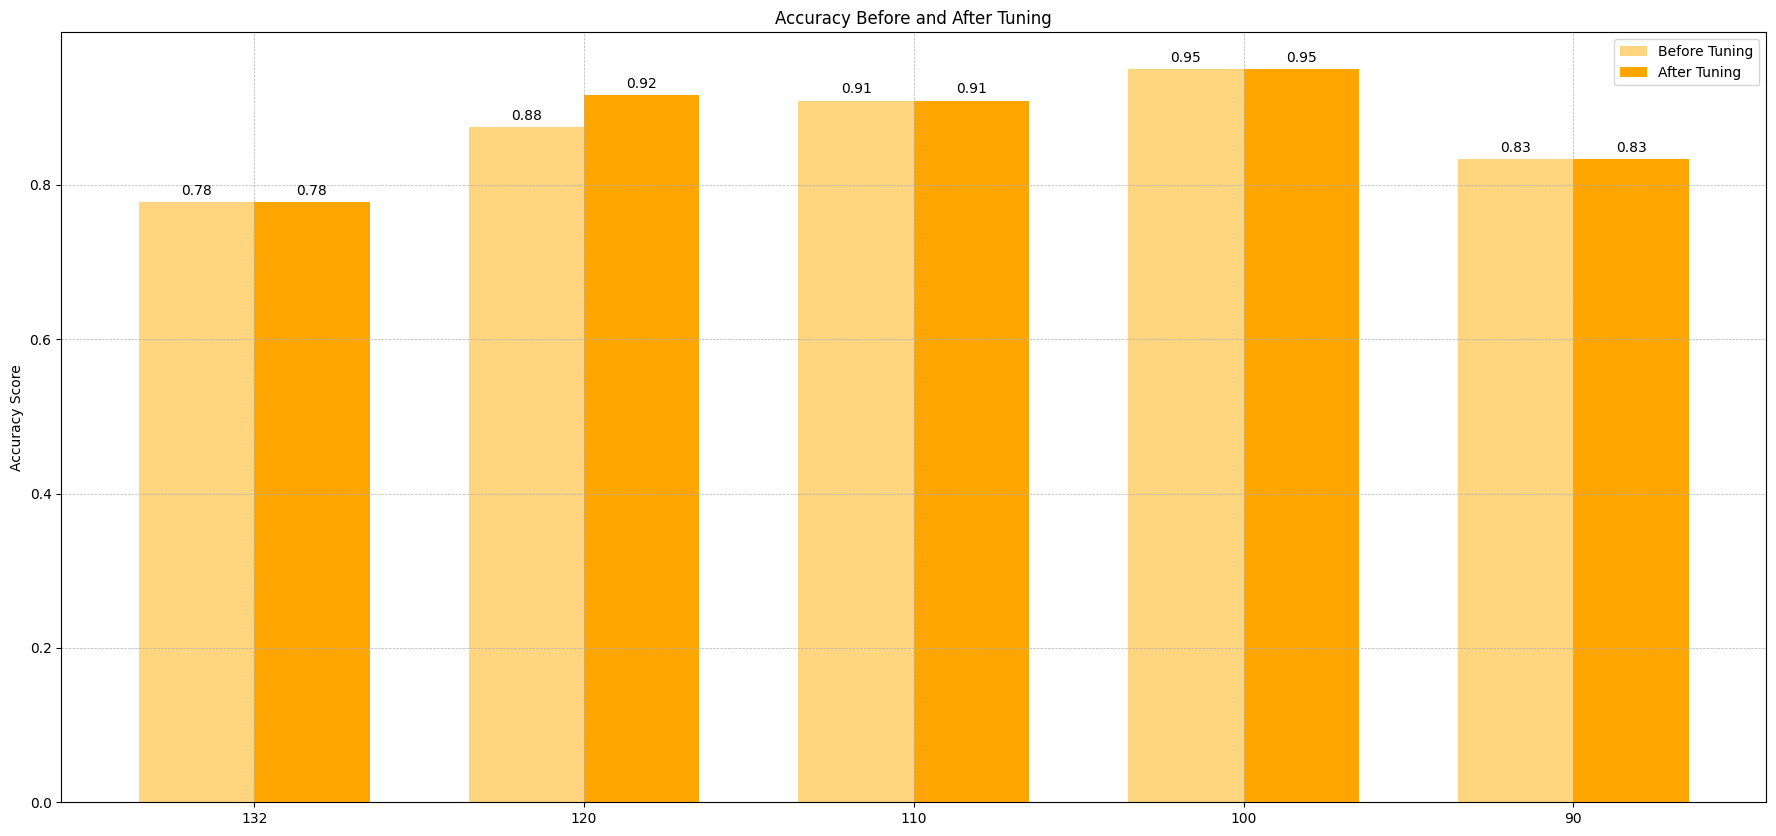

In [26]:
plot_performance(accuracy_before, accuracy_after, "Accuracy", "Accuracy Score")
plt.savefig("accuracy.png", format='png', dpi=200)
plt.show()

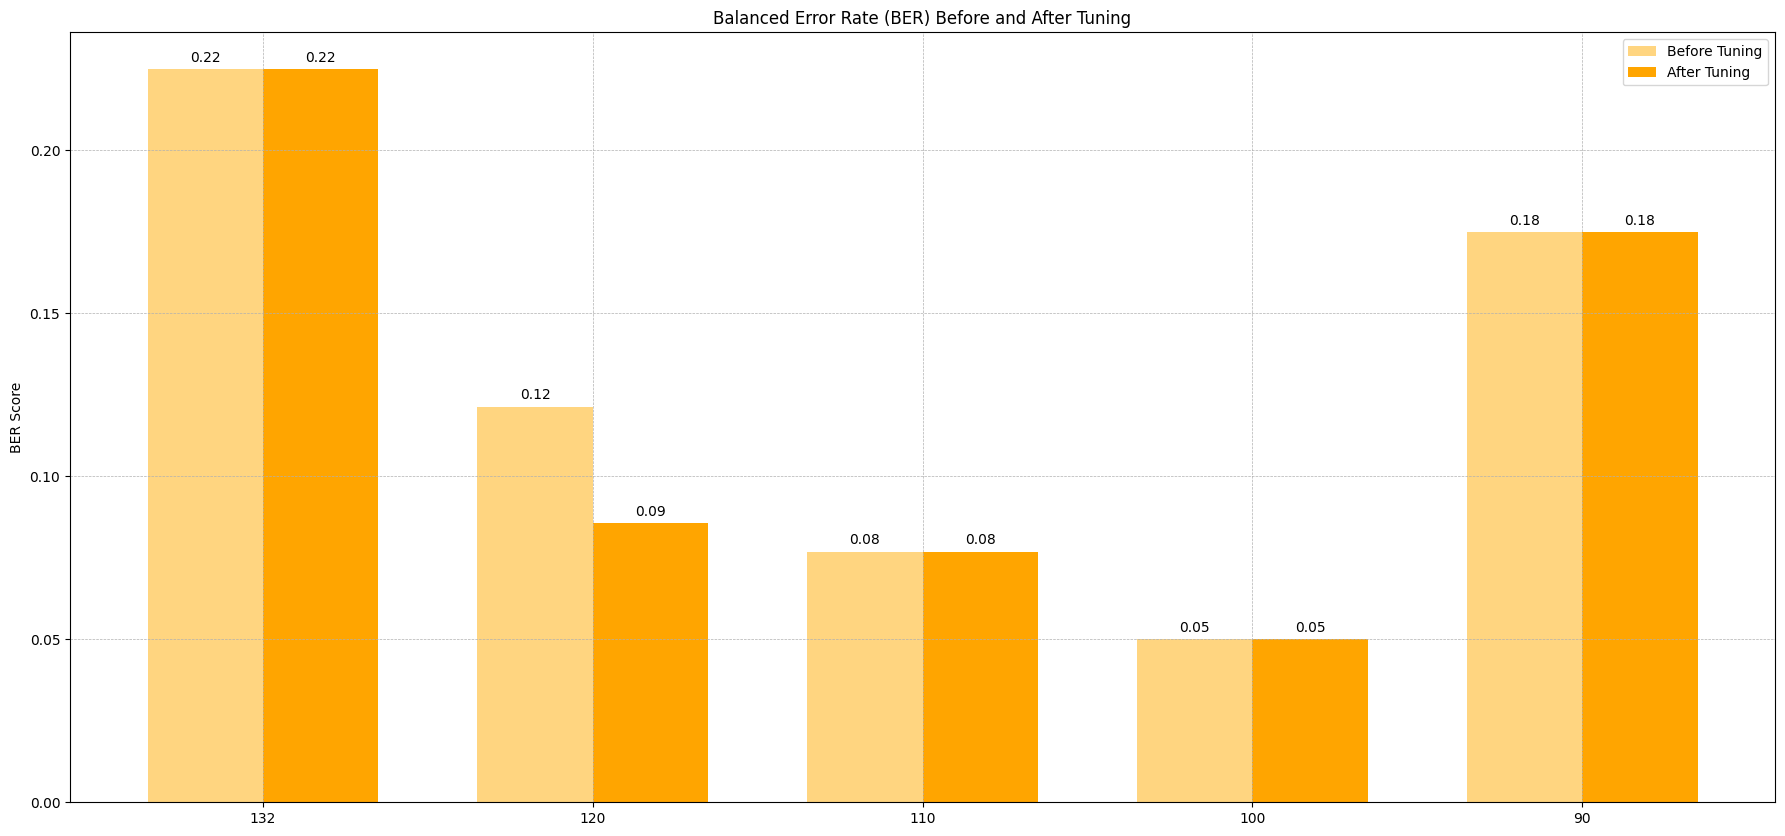

In [27]:
plot_performance(ber_before, ber_after, "Balanced Error Rate (BER)", "BER Score")
plt.savefig("ber.png", format='png', dpi=200)
plt.show()

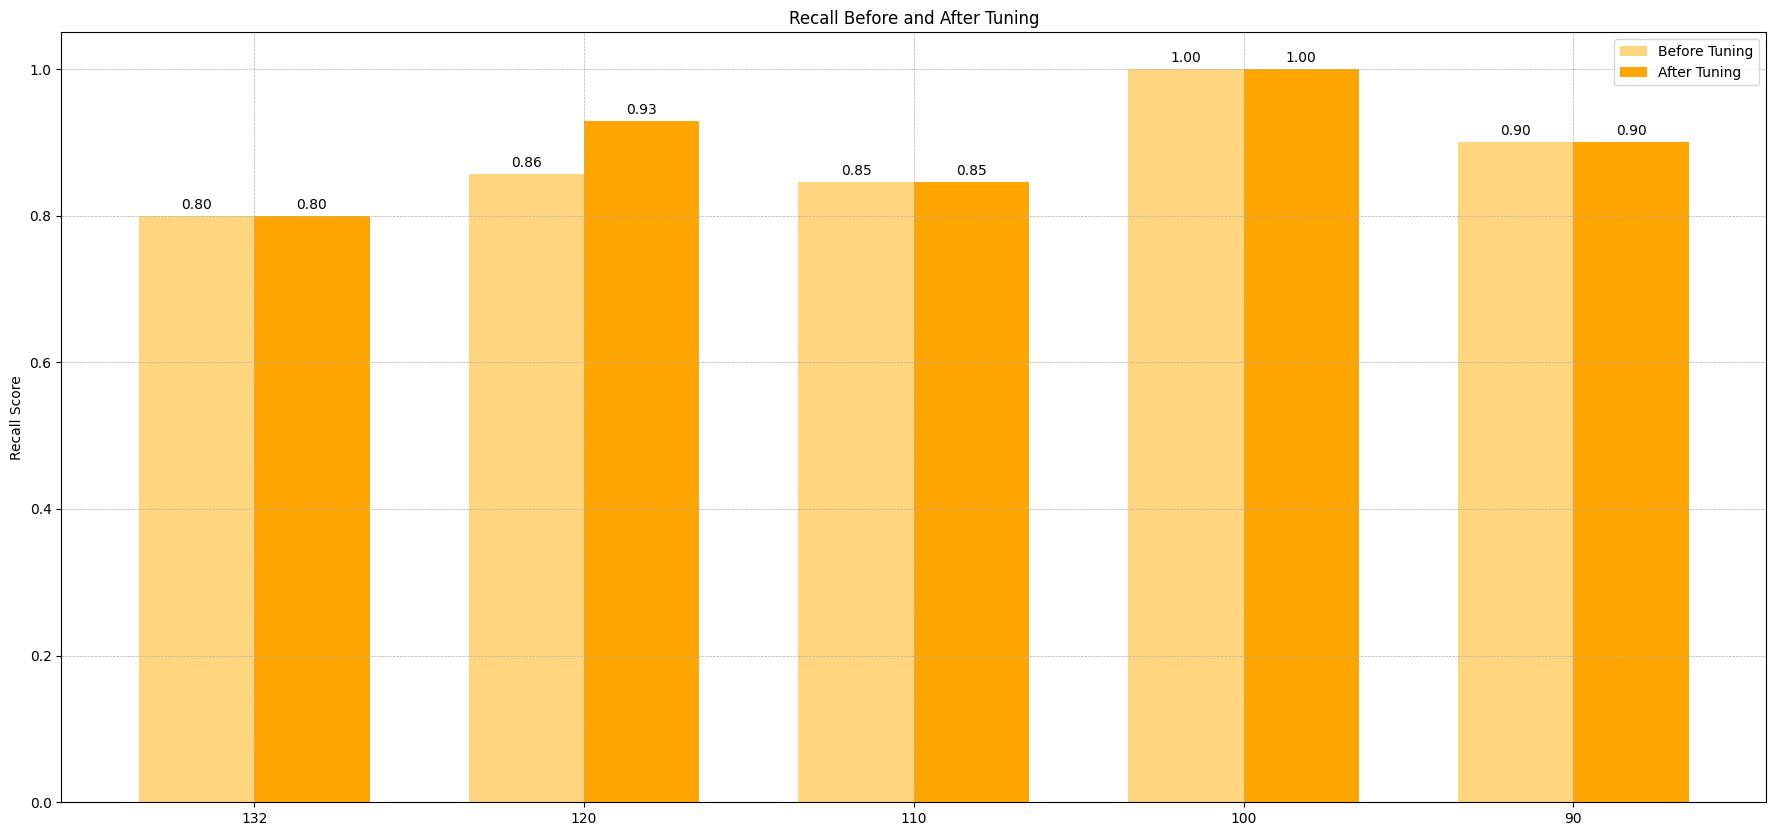

In [28]:
plot_performance(recall_before, recall_after, "Recall", "Recall Score")
plt.savefig("recall.png", format='png', dpi=200)
plt.show()